# Lead Scoring Case Study

This is a Case Study related to an Education company trying to find out potential leads that could get converted into customers. This is a group case study. Our Group comprises of:

1. Likhitha C
2. Wahid
3. Venkata Koushik Akella

## Problem statement

X Education company needs help to identify the most promising leads. This has to be done by building a Logistic regression model that can be trained with the Leads data of the past and then deployed to predict whether a particular lead will lead to payment or not. Each lead has to be given a lead score between 0 and 100 where less score means not a promising lead and vice-versa. the CEO has also given a ballpark target lead conversion rate to be 80%. 

## Goals:
1. build a logistic regression model to assign a lead score between 0 and 100 to each lead and based on the lead, classify them as hot leads or not so hot leads. 
2. The model is expected to fit certain other problems put forth by the X Education company in the form of a separate word document. fill the solutions to those problems based on the model we get in the end of this analysis.

## Step-1: Loading and Understanding data:

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# Loading database
lead = pd.read_csv('Leads.csv', encoding="UTF8", header=0)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead.shape

(9240, 37)

In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# dropping columns having only single unique values
lead1 = lead.drop(['Magazine', 'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis=1)
lead1.shape

(9240, 32)

In [10]:
# converting all string type data into lower case for ease of understanding
lead1 = lead1.applymap(lambda x: x.lower() if type(x) == str else x)
lead1.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,select,select,unemployed,better career prospects,no,no,no,no,no,no,interested in other courses,low in relevance,select,select,02.medium,02.medium,15.0,15.0,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,select,select,unemployed,better career prospects,no,no,no,no,no,no,ringing,NaN,select,select,02.medium,02.medium,15.0,15.0,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,select,student,better career prospects,no,no,no,no,no,no,will revert after reading the email,might be,potential lead,mumbai,02.medium,01.high,14.0,20.0,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,word of mouth,unemployed,better career prospects,no,no,no,no,no,no,ringing,not sure,select,mumbai,02.medium,01.high,13.0,17.0,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,select,other,unemployed,better career prospects,no,no,no,no,no,no,will revert after reading the email,might be,select,mumbai,02.medium,01.high,15.0,18.0,no,modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,NaN,01.high,02.medium,17.0,15.0,no,modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,landing page submission,google,no,no,1,2.0,1640,2.0,email opened,india,supply chain management,online search,unemployed,better career prospects,no,no,no,no,no,no,will revert after reading the email,low in relevance,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,NaN,02.medium,02.medium,15.0,15.0,no,modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,landing page submission,direct traffic,no,no,0,2.0,71,2.0,email opened,india,it projects management,NaN,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,thane & outskirts,02.medium,02.medium,14.0,14.0,yes,email opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,api,google,no,no,0,4.0,58,4.0,email opened,india,finance management,word of mouth,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,mumbai,02.medium,02.medium,13.0,16.0,no,email opened


In [11]:
# replacing all "select" cells with np.nan as these cells are those which were not selected.
lead1 = lead1.replace(to_replace="select", value=np.nan)
lead1.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no,interested in other courses,low in relevance,NaN,NaN,02.medium,02.medium,15.0,15.0,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no,ringing,NaN,NaN,NaN,02.medium,02.medium,15.0,15.0,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,NaN,student,better career prospects,no,no,no,no,no,no,will revert after reading the email,might be,potential lead,mumbai,02.medium,01.high,14.0,20.0,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,word of mouth,unemployed,better career prospects,no,no,no,no,no,no,ringing,not sure,NaN,mumbai,02.medium,01.high,13.0,17.0,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,NaN,other,unemployed,better career prospects,no,no,no,no,no,no,will revert after reading the email,might be,NaN,mumbai,02.medium,01.high,15.0,18.0,no,modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,NaN,01.high,02.medium,17.0,15.0,no,modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,landing page submission,google,no,no,1,2.0,1640,2.0,email opened,india,supply chain management,online search,unemployed,better career prospects,no,no,no,no,no,no,will revert after reading the email,low in relevance,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,NaN,02.medium,02.medium,15.0,15.0,no,modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,landing page submission,direct traffic,no,no,0,2.0,71,2.0,email opened,india,it projects management,NaN,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,thane & outskirts,02.medium,02.medium,14.0,14.0,yes,email opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,api,google,no,no,0,4.0,58,4.0,email opened,india,finance management,word of mouth,NaN,NaN,no,no,no,no,no,no,NaN,NaN,NaN,mumbai,02.medium,02.medium,13.0,16.0,no,email opened


In [12]:
len(lead1)

9240

In [13]:
# calculating % missing values for different columns
round(100*((lead1.isnull().sum())/len(lead1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
# getting rid of all columns having nearly 40% or more missing values
lead2 = lead1.drop(['How did you hear about X Education','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)
lead2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,modified


<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'>in the above list of columns having close to 40% missing values, we are not getting rid of "Specialization" column as I think it is important for further analysis. hence leaving that column intact and will deal with missing values later </font> </div>

In [15]:
round(100*((lead2.isnull().sum())/len(lead2)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [16]:
# replacing NaN values in the 4 columns having more than 20% missing values 
# with "not selected" for our analysis purposes
lead2['Country'] = lead2['Country'].fillna("not selected")
lead2['Specialization'] = lead2['Specialization'].fillna("not selected")
lead2['What is your current occupation'] = lead2['What is your current occupation'].fillna("not selected")
lead2['What matters most to you in choosing a course'] = lead2['What matters most to you in choosing a course'].fillna("not selected")

In [17]:
lead2.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not selected,not selected,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,not selected,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,not selected,unemployed,better career prospects,no,no,no,no,no,no,no,modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,not selected,not selected,not selected,not selected,no,no,no,no,no,no,no,modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,landing page submission,google,no,no,1,2.0,1640,2.0,email opened,india,supply chain management,unemployed,better career prospects,no,no,no,no,no,no,no,modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,not selected,not selected,not selected,not selected,no,no,no,no,no,no,no,modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,landing page submission,direct traffic,no,no,0,2.0,71,2.0,email opened,india,it projects management,not selected,not selected,no,no,no,no,no,no,yes,email opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,api,google,no,no,0,4.0,58,4.0,email opened,india,finance management,not selected,not selected,no,no,no,no,no,no,no,email opened


In [19]:
lead2['Country'].value_counts()

india                   6492
not selected            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> in the "Country" column, there is an attribute called unknown. we'll convert that attribute to "not selected" as well for our analysis </font> </div>

In [19]:
def country_cat(x):
    if x=='india':
        return 'india'
    elif x=='not selected':
        return 'not selected'
    else:
        return 'out of india'

lead2['Country'] = lead2['Country'].map(lambda x: country_cat(x))
lead2['Country'].value_counts()

india           6492
not selected    2461
out of india     287
Name: Country, dtype: int64

In [20]:
# checking % missing values again
round(100*((lead2.isnull().sum())/len(lead2)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [20]:
# there are few columns that still have missing values. 
# however these are <2% and hence, eliminating these rows will not lead to data loss. 
# However let us check the % of null rows among total rows
round(100*(sum(lead2.isnull().sum(axis=1)>1)/len(lead2)),2)

1.48

In [21]:
lead2.shape

(9240, 23)

In [23]:
lead3 = lead2[lead2.isnull().sum(axis=1)<1]
lead3.shape

(9074, 23)

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> as we can see from the above, there are 9074 rows left out of 9240 rows initially which is aroung 1.48% loss in data and can be accepted. for further analysis, we'll focuss on lead3 dataframe for the analysis</font> </div>

In [24]:
round(100*((lead3.isnull().sum())/len(lead3)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> as observed from the above, we can see there are no null values in the entire lead3 dataframe and hence we can start EDA analysis</font> </div>

In [25]:
lead3.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [26]:
lead3['Prospect ID'].nunique()

9074

In [27]:
unique = {}
for att in lead3.columns:
    unique[att] = lead3[att].nunique()
unique

{'Prospect ID': 9074,
 'Lead Number': 9074,
 'Lead Origin': 4,
 'Lead Source': 20,
 'Do Not Email': 2,
 'Do Not Call': 2,
 'Converted': 2,
 'TotalVisits': 41,
 'Total Time Spent on Website': 1717,
 'Page Views Per Visit': 114,
 'Last Activity': 17,
 'Country': 39,
 'Specialization': 19,
 'What is your current occupation': 7,
 'What matters most to you in choosing a course': 4,
 'Search': 2,
 'Newspaper Article': 2,
 'X Education Forums': 2,
 'Newspaper': 2,
 'Digital Advertisement': 2,
 'Through Recommendations': 2,
 'A free copy of Mastering The Interview': 2,
 'Last Notable Activity': 16}

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> as observed from the above, Prospect ID and Lead Number are unique for all the leads and hence can be dropped as they don't effect the analysis significantly.</font> </div>

In [28]:
lead3.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)
lead3.shape

(9074, 21)

## Step-2: EDA:

<font color='Blue'>_**Univariate Analysis:**_</font>

In [29]:
lead3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> first of all, I'll look into the object type variables and see the count_plots of these attributes.</font> </div>

In [30]:
obj_col = []
for col in lead3.columns:
    if lead3[col].dtype == 'O':
        obj_col.append(col)
obj_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [31]:
len(obj_col)

17

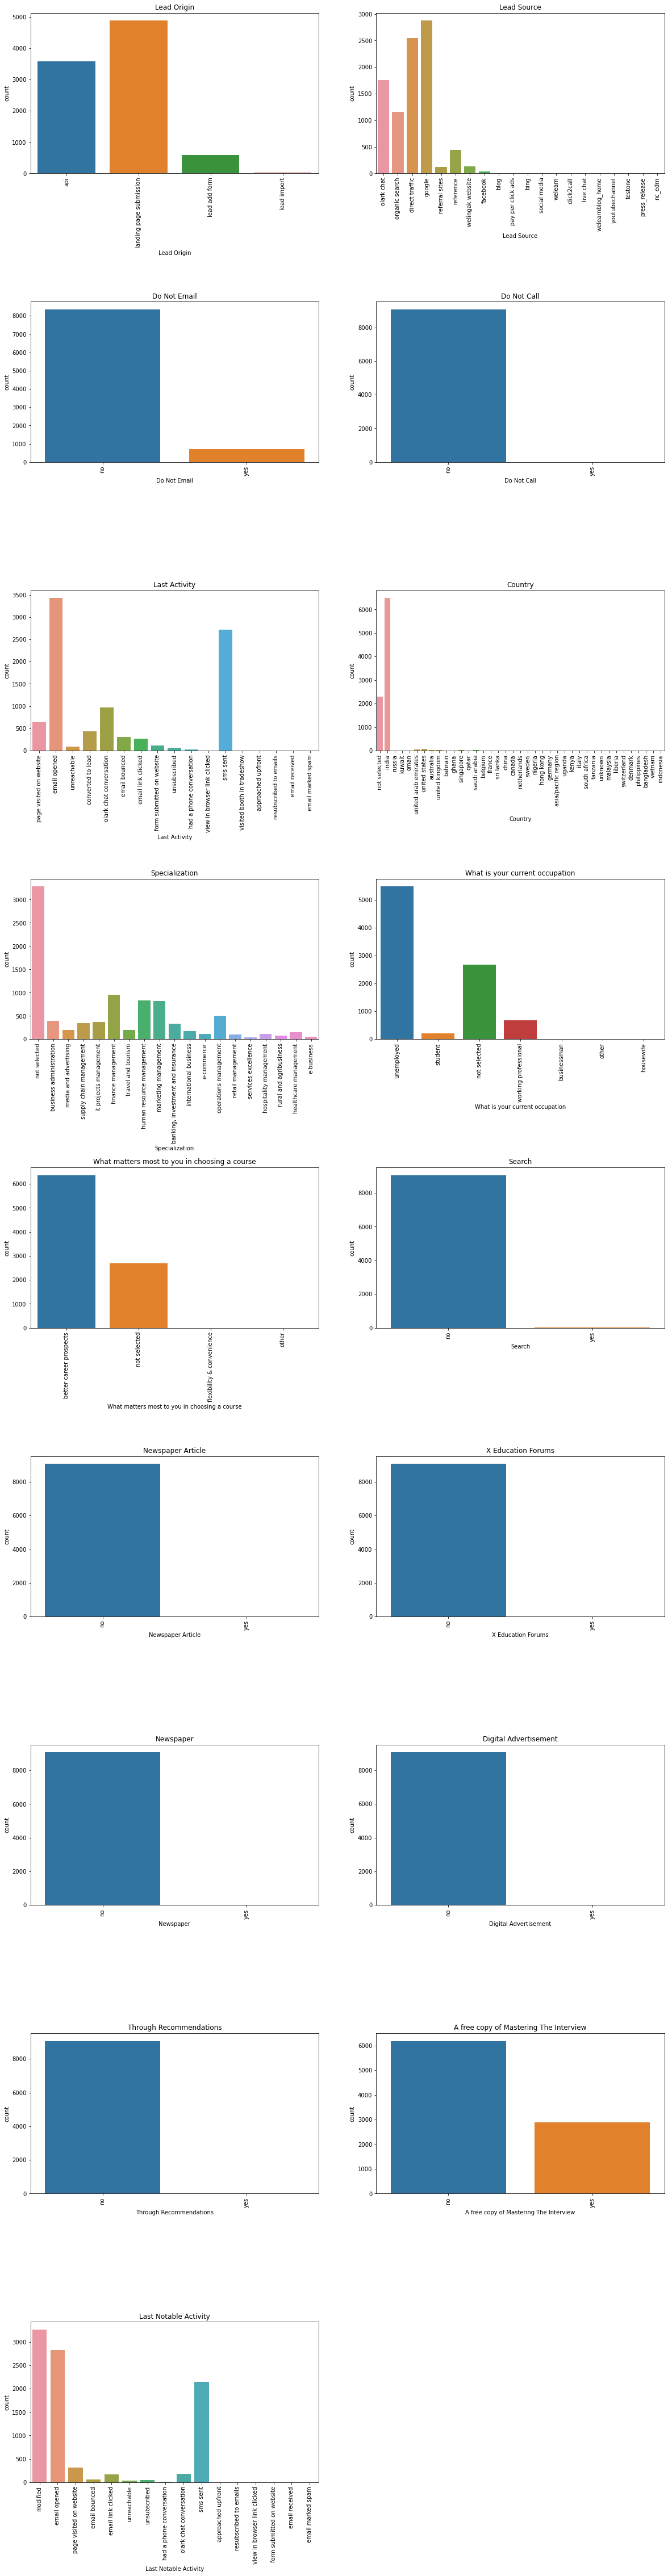

In [32]:
# there are 17 object type data in the dataframe.
# we'll do the count plots on these to visualize the distribution of the data.
i=1
fig = plt.figure(figsize=(20,80))
fig.subplots_adjust(hspace=0.8)
for col in obj_col:
        plt.subplot(9,2,i)
        sns.countplot(lead3[col])
        plt.title('{}'.format(col))
        plt.xticks(rotation=90)
        i=i+1

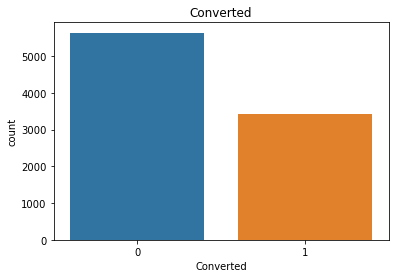

In [33]:
# plotting the "converted" column to see the % conversion rate
sns.countplot(lead3['Converted'])
plt.title("Converted")
plt.show()

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> now we'll look into the numerical type variables and do the univariate analysis of these variables</font> </div>

In [34]:
num_col = [col for col in lead3.columns if col not in obj_col]
num_col

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [34]:
num_df = lead3[num_col]
num_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


(0.0, 20.0)

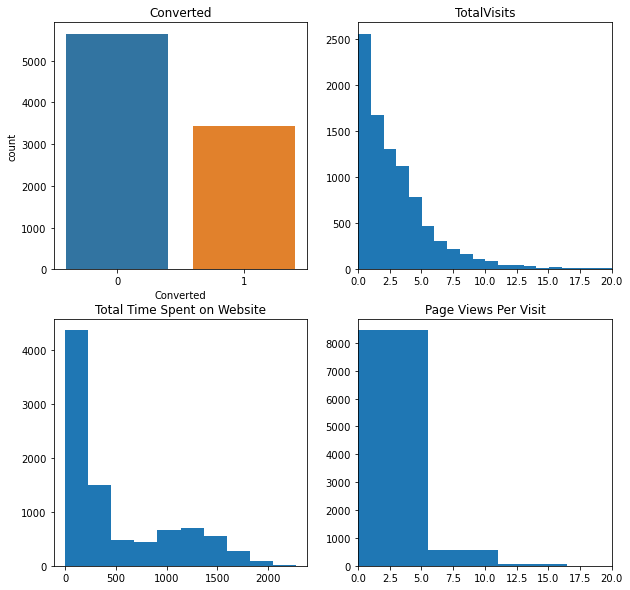

In [36]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(lead3['Converted'])
plt.title("Converted")

plt.subplot(2,2,2)
plt.hist(x='TotalVisits', data=lead3, bins=250)
plt.title("TotalVisits")
plt.xlim(0,20)

plt.subplot(2,2,3)
plt.hist(x='Total Time Spent on Website', data=lead3, bins=10)
plt.title("Total Time Spent on Website")

plt.subplot(2,2,4)
plt.hist(x='Page Views Per Visit', data=lead3, bins=10)
plt.title("Page Views Per Visit")
plt.xlim(0,20)

<font color='blue'>_**Bi-Variate analysis:**_</font>

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> in this bi-variate analysis, we'll pitch each categorical variable agains conversion rate to see how each attribute effects the conversion rate</font> </div>

In [37]:
# we have already segregated the categorical columns
obj_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

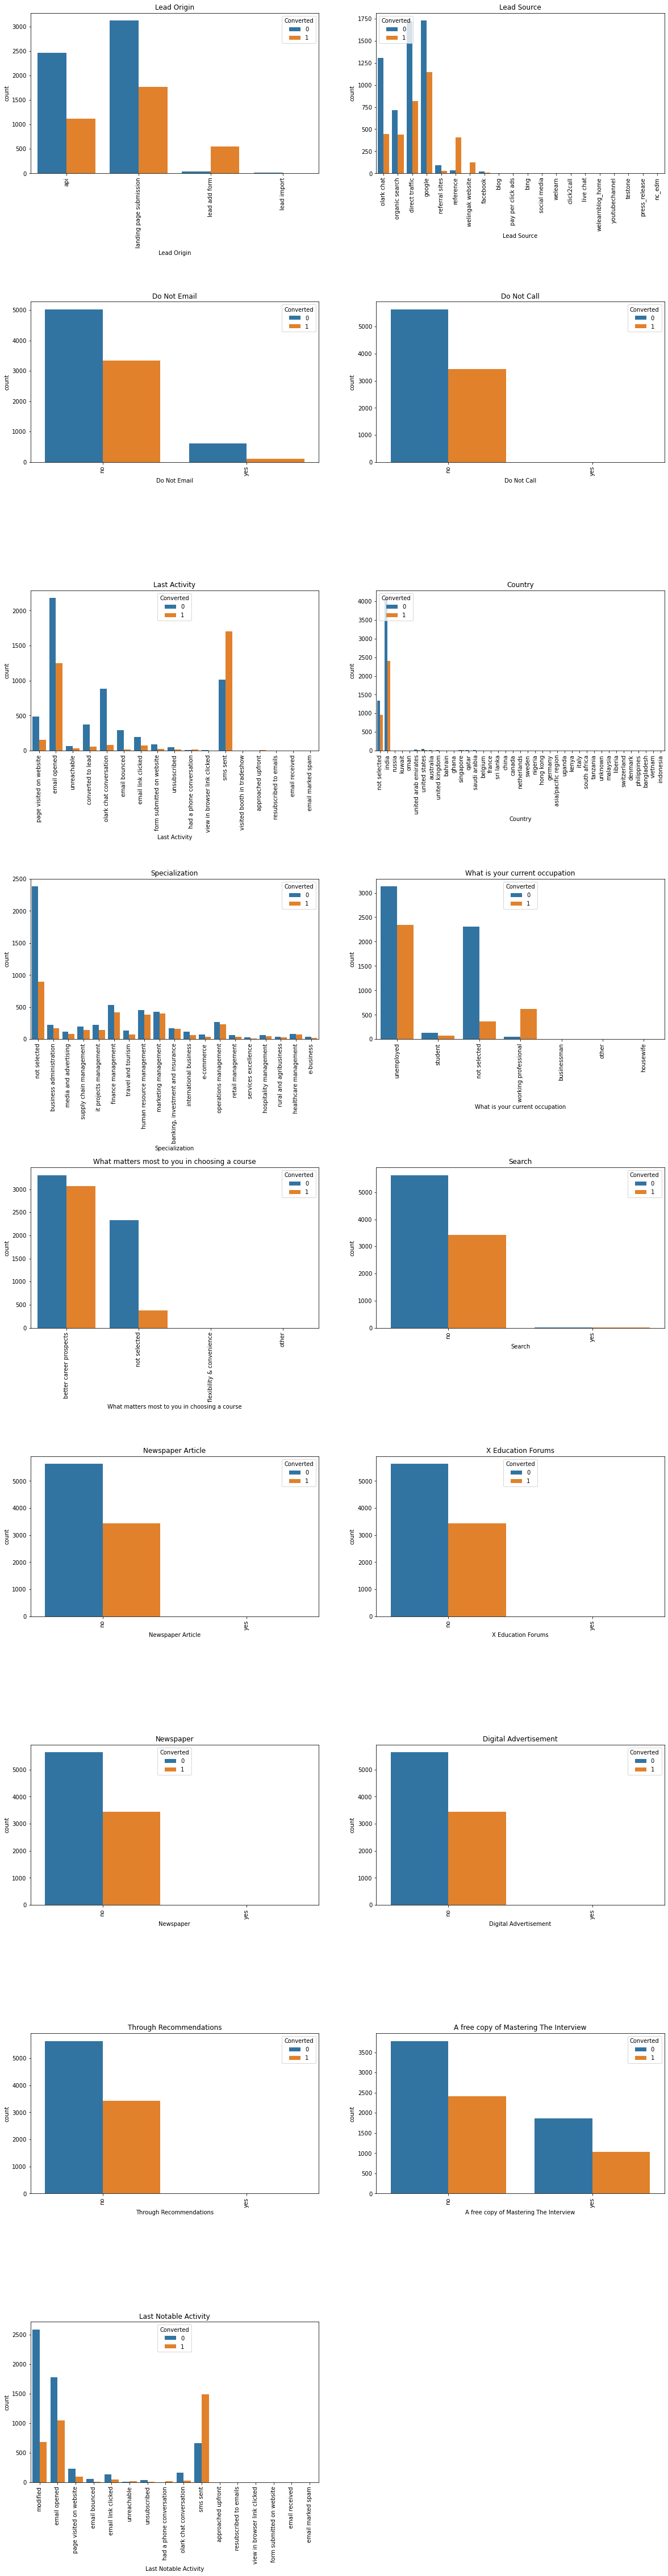

In [38]:
i=1
fig = plt.figure(figsize=(20,80))
fig.subplots_adjust(hspace=0.8)
for col in obj_col:
        plt.subplot(9,2,i)
        sns.countplot(x=col, hue='Converted', data=lead3)
        plt.title('{}'.format(col))
        plt.xticks(rotation=90)
        i=i+1

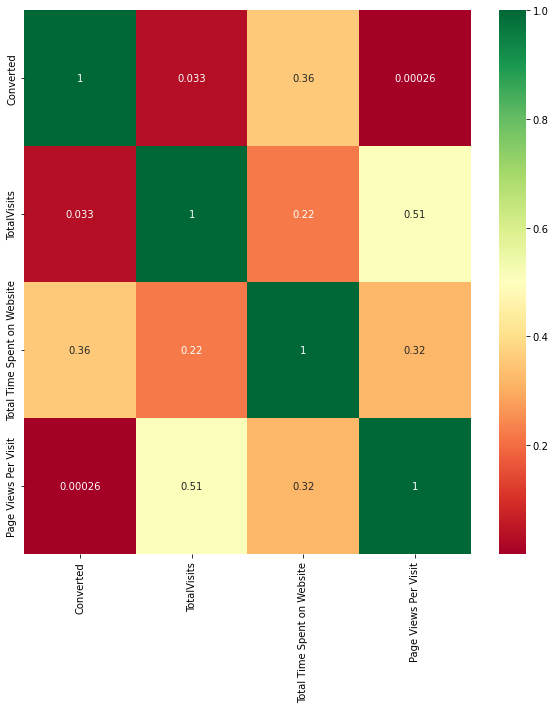

In [39]:
# checking the correlation plot to check for correlations among numerical variables
plt.figure(figsize=(10,10))
sns.heatmap(lead3[num_col].corr(), annot=True, cmap='RdYlGn')
plt.show()

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> from the above correlation plot, we can see that there is no strong correlation among any of the numerical variables </font> </div>

In [40]:
num_col

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

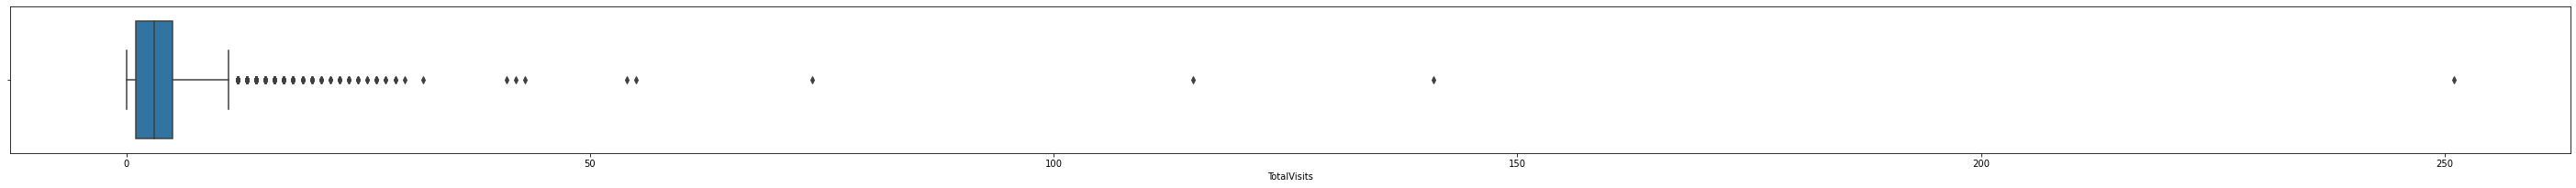

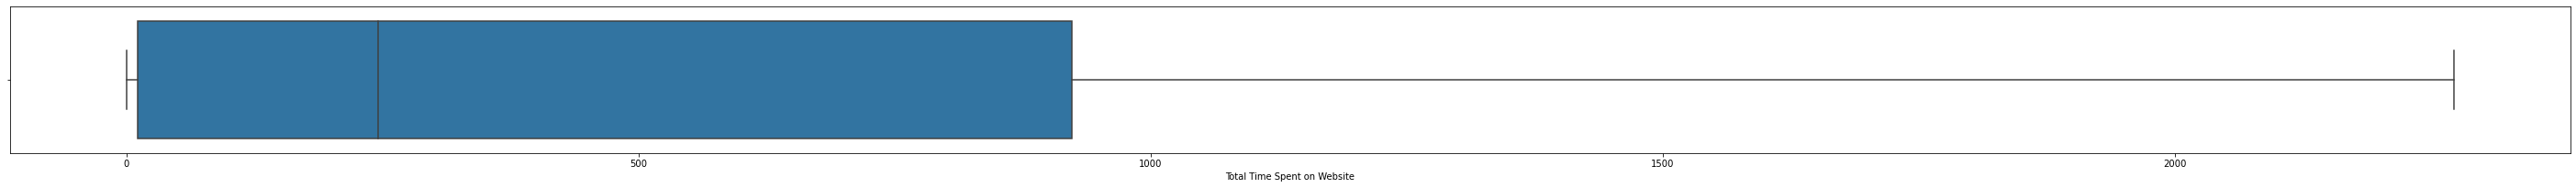

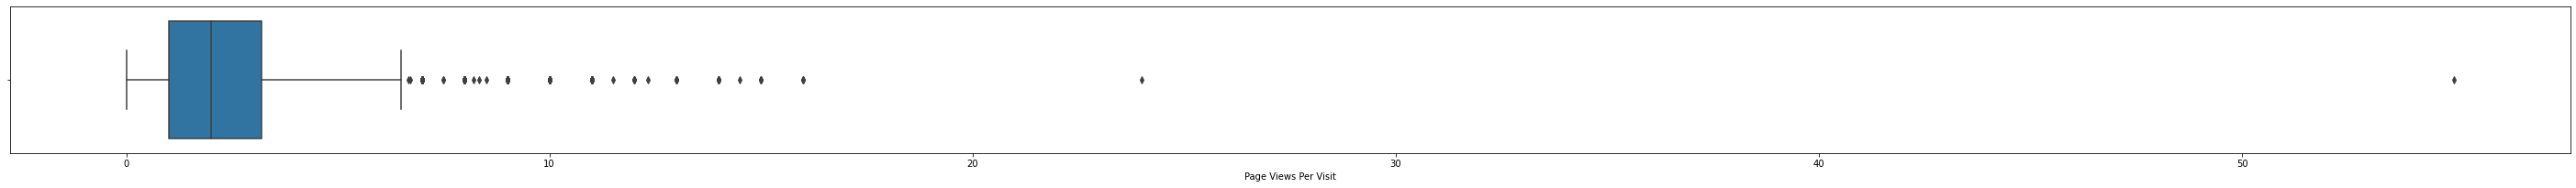

In [41]:
# now let's check the boxplots for numerical variables to see for any 
plt.figure(figsize=(50,10))
plt.subplot(3,1,1)
sns.boxplot(x='TotalVisits', data=lead3, )
plt.show()

plt.figure(figsize=(50,10))
plt.subplot(3,1,2)
sns.boxplot(x='Total Time Spent on Website', data=lead3, )
plt.show()

plt.figure(figsize=(50,10))
plt.subplot(3,1,3)
sns.boxplot(x='Page Views Per Visit', data=lead3, )
plt.show()

<font color='red'> **NOTE:** </font> <div class="alret alert-info"><font color='Green'> although there are some  outliers in the 'TotalVisits' and 'Page Views per visits' columns, these are important in model building and so we are not dropping these columns. Now moving ahead with creating dummy variables for categorical variables have more than 3 categories.</font> </div>

## Step-3: Creating Dummy Variables: